# SIDM Profile Generator Example

In [1]:
import matplotlib.pyplot as plt
from sidm_halos import SIDMHaloSolution, OuterNFW

lenstronomy not available
No colossus cosmology set. Defaulting to Planck 2018


## Cluster halo and SIDM parameters

In [2]:
# ====================================================== #
# == These are the parameters we should let users set == #
# ====================================================== #

# Mass is in units of solar masses. This value is a large galaxy cluster
mass = 5e14
concentration = 5
# The "isothermal radius", this is the parameter that relates to SIDM
# units of kiloparsecs (kpc)
r1 = 75
# redshift tells us how far away a galaxy cluster is. unitless
redshift = 0.3

# this is annoying pedantic stuff about how the mass is interpeted.
# possible options should be '200m', '200c', '500m', '500c', 'vir'
mdef = '200m'

## Baryon density profile

This is basically the distribution of "normal matter" (i.e., "baryons", not dark matter) in the dark matter halo.

In [3]:
# ====================================================== #
# == These are the parameters we should let users set == #
# ====================================================== #

mass_baryons = 2e12
concentration_baryons = 8

baryon_density = OuterNFW(mass_baryons, concentration_baryons, z=redshift, mdef=mdef)

[]

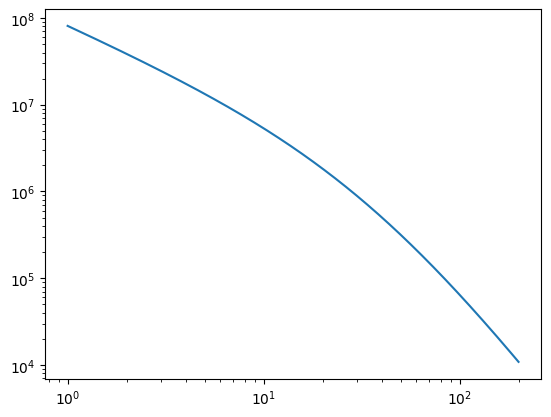

In [4]:
# radii in kpc
rs = np.logspace(0, 2.3, 1001)
plt.plot(rs, baryon_density.density_3d(rs))
plt.loglog()

## Solving for the SIDM density profiles

In [5]:
soln_no_baryons = SIDMHaloSolution.solve_outside_in(
    M=mass, c=concentration, r1=r1, z=redshift, mdef=mdef
)

soln_w_baryons = SIDMHaloSolution.solve_outside_in(
    M=mass, c=concentration, r1=r1, z=redshift, mdef=mdef,
    baryon_profile=baryon_density.density_3d,
)

# Make a nice plot

Text(0, 0.5, '$\\rho(r)$ ($M_{☉}/kpc^3$)')

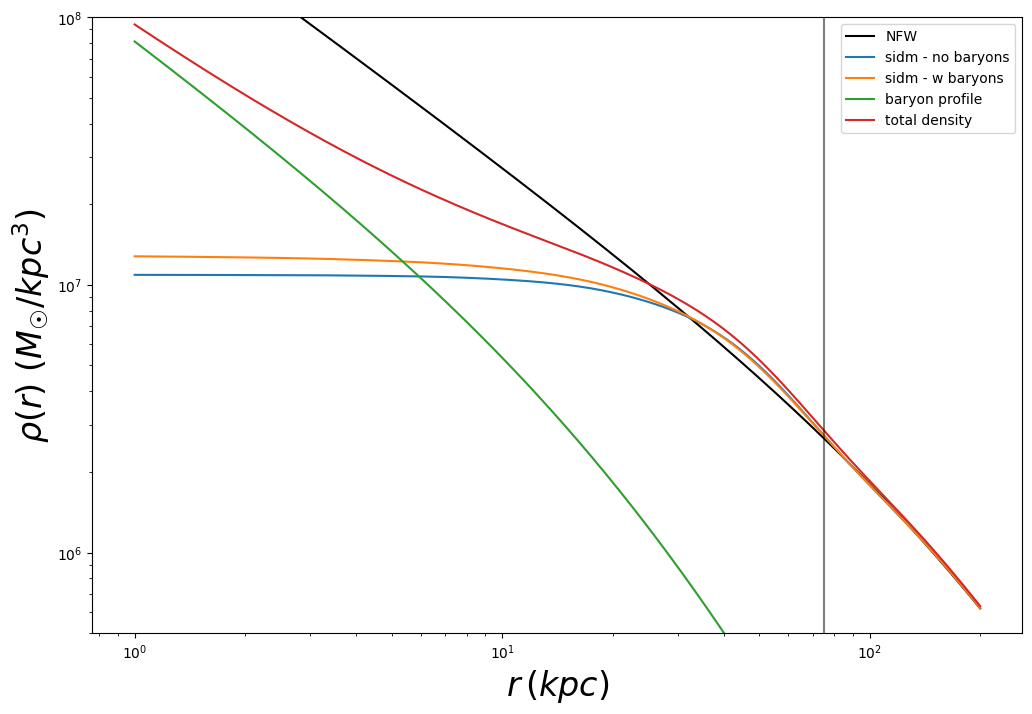

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(rs, soln_w_baryons.outer_nfw.density_3d(rs), label='NFW', color='k')
plt.plot(rs, soln_no_baryons.density_3d(rs), label='sidm - no baryons')
plt.plot(rs, soln_w_baryons.density_3d(rs), label='sidm - w baryons')
plt.plot(rs, baryon_density.density_3d(rs), label='baryon profile')
plt.plot(rs, soln_w_baryons.density_3d(rs) + baryon_density.density_3d(rs), label='total density')
# Mark the radius r1
plt.vlines(r1, 0, 1e9, color='k', alpha=0.5)
plt.ylim((5e5, 1e8))
plt.loglog()
plt.legend()
plt.xlabel(r'$r\,(kpc)$', fontsize=24)
plt.ylabel(r'$\rho(r)$ ($M_{☉}/kpc^3$)', fontsize=24)